# Application of Tensor Decompositions
[Return to Table of Contents](./0_Table_of_contents.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Imports for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Utils for this tutorial
from inns.io import ETH80, plot_tensors

#
from hottbox.algorithms.classification import TelVI

#
from hottbox.version import __version__ as hottbox_version
print("HOTTBOX version: {}".format(hottbox_version))

HOTTBOX version: 0.2.2


# Utilities for interacting with ETH-80 dataset

[**ETH-80 dataset**](https://www.mpi-inf.mpg.de/departments/computer-vision-and-multimodal-computing/research/object-recognition-and-scene-understanding/analyzing-appearance-and-contour-based-methods-for-object-categorization/) consists of 3280 colour images (128×128 pixels) from 8 categories: *apple, car, cow, cup, dog, horse, pear, tomato*. Each category contains 10 different objects with 41 views per object, spaced equally over the
viewing hemisphere. For ease of interaction with this dataset we provide you with `ETH80` class and some other utility functions. Here we will briefly see them in action.



Number of samples: 3280

Data sample:
This tensor is of order 3 and consists of 49152 elements.
Sizes and names of its modes are (128, 128, 3) and ['pixel-X', 'pixel-Y', 'color'] respectively.



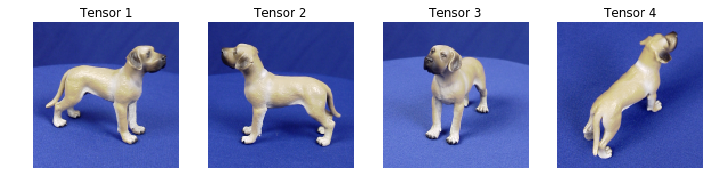

In [23]:
# Initialise dataset
eth = ETH80()

# By default returns all available samples in a list
# where each sample is a 'Tensor'
data, labels = eth.get_samples()
print("Number of samples: {}\n".format(len(data)))

print("Data sample:\n{}\n".format(data[0]))

# Plot up to first four data samples
plot_tensors(data)

Number of samples: 20



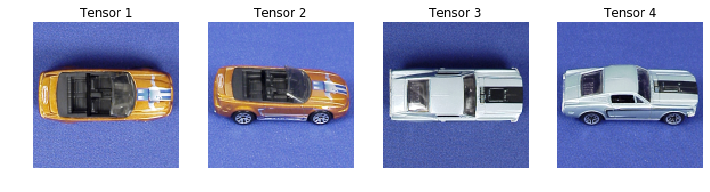

In [26]:
# Select only a portion of the whole dataset
data, labels = eth.get_samples(objects=["car"], 
                               angle_1=["000", "045"], 
                               angle_2=["000"])
print("Number of samples: {}\n".format(len(data)))
plot_tensors(data)

- To se all available options use the following properties of the `ETH80` class

```python
# List of object names
eth.available_objects

# List of angle pairs
eth.available_angle_pairs
```

# Application: Image compression 

Color images can be naturally represented as a tensor of order three with the shape `(height x width x channels)` where channels are, for example, Red, Blue and Green (RGB)

<img src="./imgs/image_to_base_colors.png" alt="Drawing" style="width: 500px;"/>

By keeping its original structure, allows to apply methods from multi-linear analysis. For instance, we can employ algorithms for Tucker decompositions in order to commress oringinal informaiton by varying values of desired multi-linear rank.

Relative error of approximation = 0.058927786135894576


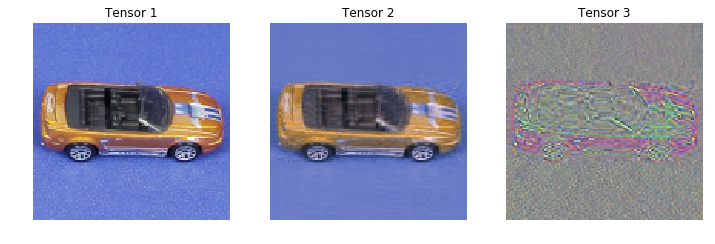

In [34]:
from hottbox.algorithms.decomposition import HOSVD
from hottbox.metrics.decomposition import residual_tensor, residual_rel_error


data, _ = eth.get_samples(objects=["car"], 
                               angle_1=["045"], 
                               angle_2=["000"])


# Initialise algorithm and preform decomposition
algorithm = HOSVD()
ml_rank = (25, 25, 2)
for sample in data[:1]:
    tensor_tkd = algorithm.decompose(sample, rank=ml_rank)

    # Evaluate result
    tensor_res = residual_tensor(sample, tensor_tkd)
    rel_error = tensor_res.frob_norm / sample.frob_norm

    print("Relative error of approximation = {}".format(rel_error))
    plot_tensors([sample, tensor_tkd.reconstruct(), tensor_res])

# Tensor Ensemble Learning

In [ ]:
eth = ETH80()

In [ ]:
eth.meta_data.head()

In [ ]:
ilia, dima = eth.get_samples()

In [ ]:
len(ilia)

In [ ]:
dima.shape

In [ ]:
# data, labels = eth.get_samples(["dog", "car"], ["000"], ["000"])
# data, labels = eth.get_samples(["dog", "car"], ["045"], [])
data, labels = eth.get_samples(["dog", "car"], [], [])
labels

In [ ]:
plot_tensors(data[0], data[1])

In [ ]:
alg = HOSVD()

In [ ]:
data_telvi = [alg.decompose(sample, (5,5,2)) for sample in data]
print(len(data_telvi))
data_telvi[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_telvi, labels, test_size=0.2, random_state=42)

In [ ]:
plot_tensors(X_train[0].reconstruct(), X_test[0].reconstruct())

In [ ]:
base_classifiers = [SVC(gamma='auto') for _ in range(12)]

In [ ]:
telvi = TelVI(base_clf=base_classifiers, probability=True, verbose=True)

In [ ]:
telvi.fit(X_train, y_train)

In [ ]:
score = telvi.score(X_test, y_test)
score

## Tuning hyperparameters of the base classifiers

In [ ]:
search_params = [dict(gamma=[0.001, 0.01, 1, 10], C=[0.1, 1, 10, 100]) for _ in range(12)]
telvi.grid_search(X_train, y_train, search_params)

In [ ]:
telvi.fit(X_train, y_train)

In [ ]:
score = telvi.score(X_test, y_test)
score